## Step 1: Basic stats about the results - AGE

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

dev_age_dict = pd.read_pickle(r'train/tuh_eeg_seizure__age_dict.pickle')
dev_age_dict_df = pd.DataFrame.from_dict(dev_age_dict, orient='index',columns=['number'])
dev_age_dict_df = dev_age_dict_df.reset_index().rename(columns={"index":"age"})
dev_age_dict_df = dev_age_dict_df.sort_values('age')
dev_age_dict_df.shape[0] # Number of age values


88

FOR THE DEV SET:

This is very odd, indeed the dev set should contain (number of files: 1,832. number of sessions: 342. number of patients: 53)

I have to check, but the only reason to have 53 patients but 59 age values is that 6 patients have had their birthday in between sessions. This is plausible, however, 74 recordings are attributed to a 117 years old patient, which is unreasonable. I need to email about that. 



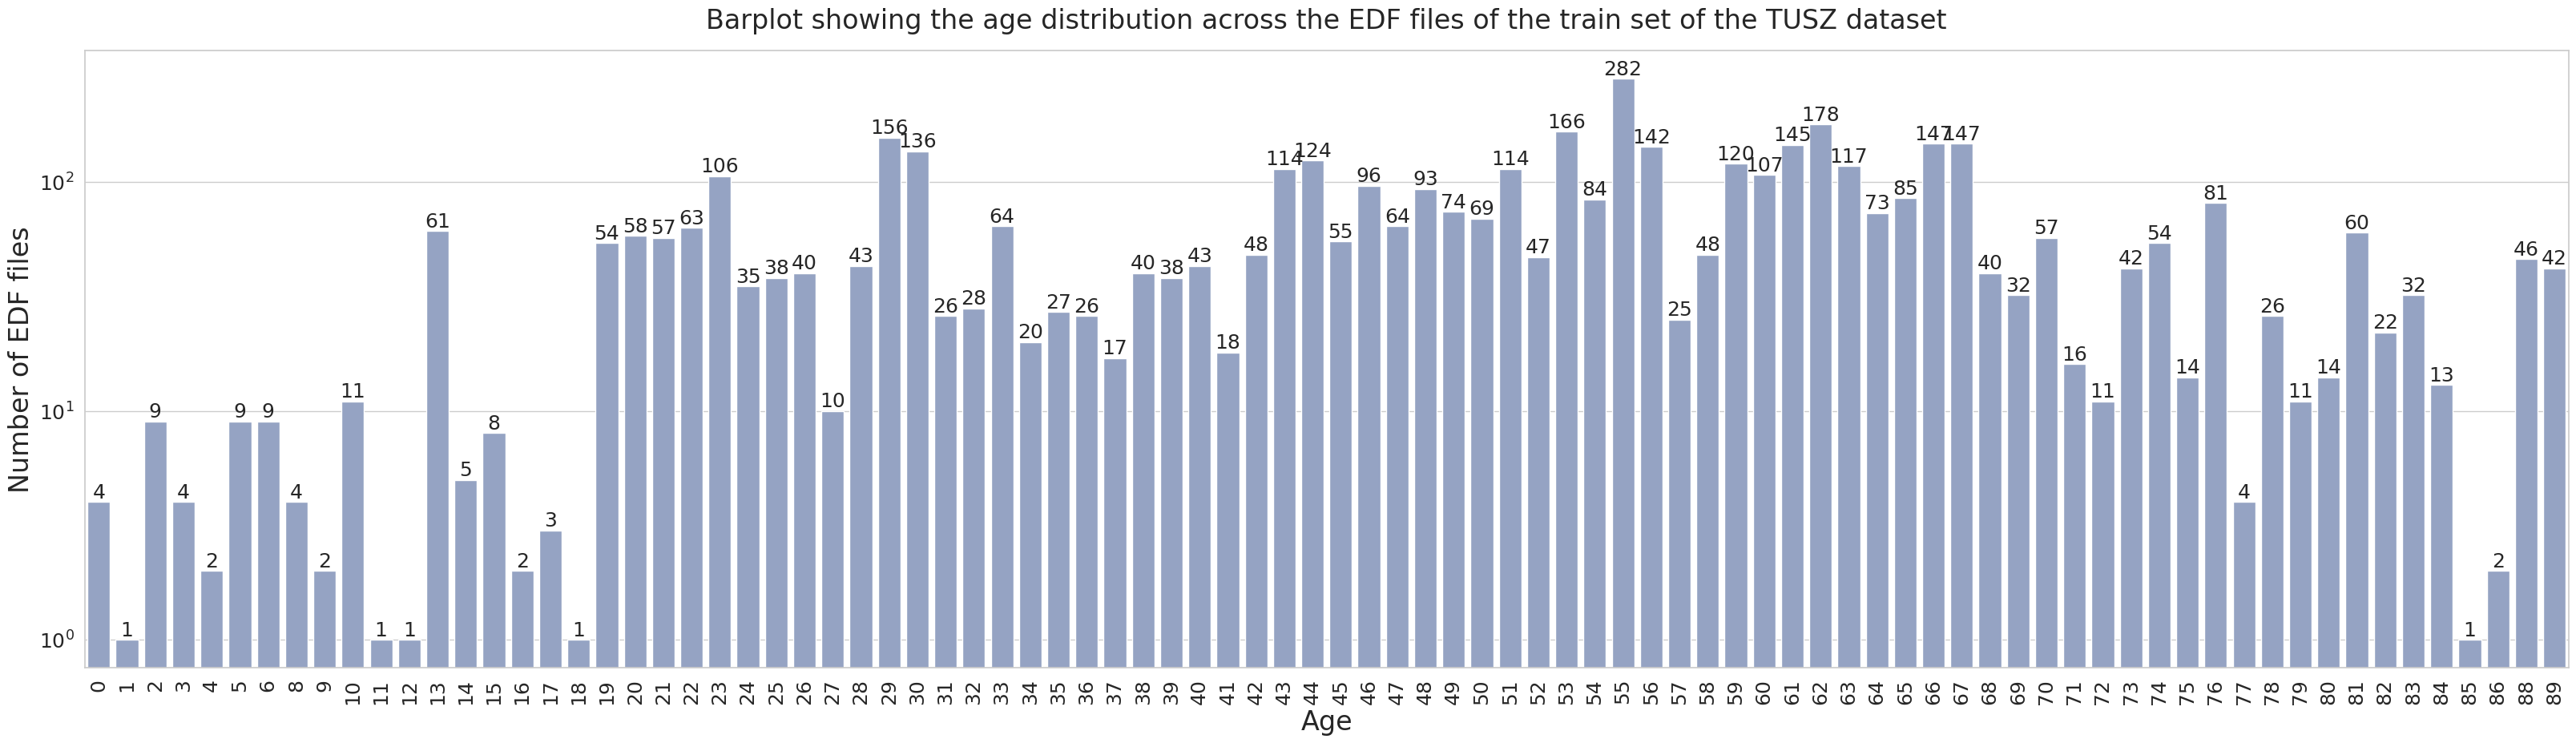

In [110]:
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

sns.set_style('whitegrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('font', size=18)          # controls default text sizes

plt.figure(figsize=(30,10))
colors = sns.color_palette('Set2')[2]

ax = sns.barplot(data = dev_age_dict_df, x='age', y='number',width=0.8, dodge=False, color=colors) #palette='Set2')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1i')

for item in ax.get_xticklabels():
    item.set_rotation(90)
    

plt.yscale("log")  
plt.xlabel('Age')
plt.ylabel('Number of EDF files')
plt.title('Barplot showing the age distribution across the EDF files of the train set of the TUSZ dataset', pad=20)
plt.savefig("Age_distribution_train_tusz.svg")
plt.show()

## Step 2: data about channels, prior to filtering out useless ones

In [111]:
unknown = ['BURSTS','EEG PG1-LE','EEG PG1-REF','EEG PG2-LE','EEG PG2-REF','EEG RLC-LE','EEG RLC-REF','EEG ROC-REF','EEG LOC-REF','EEG LUC-LE','EEG LUC-REF','SUPPR','EEG C3P-REF','EEG C4P-REF']

DC_voltage = ['DC1-DC','DC2-DC','DC3-DC','DC4-DC','DC5-DC','DC6-DC','DC7-DC','DC8-DC']

no_signal = ['EEG 100-REF','EEG 101-REF','EEG 102-REF','EEG 103-REF','EEG 104-REF','EEG 105-REF','EEG 106-REF','EEG 107-REF','EEG 108-REF','EEG 109-REF','EEG 110-REF','EEG 111-REF','EEG 112-REF','EEG 113-REF','EEG 114-REF','EEG 115-REF','EEG 116-REF','EEG 117-REF','EEG 118-REF','EEG 119-REF','EEG 120-REF','EEG 121-REF','EEG 122-REF','EEG 123-REF','EEG 124-REF','EEG 125-REF','EEG 126-REF','EEG 127-REF','EEG 128-REF','EEG 33-REF','EEG 34-REF','EEG 35-REF','EEG 36-REF','EEG 37-REF','EEG 38-REF','EEG 39-REF','EEG 40-REF','EEG 41-REF','EEG 42-REF','EEG 43-REF','EEG 44-REF','EEG 45-REF','EEG 46-REF','EEG 47-REF','EEG 48-REF','EEG 49-REF','EEG 50-REF','EEG 51-REF','EEG 52-REF','EEG 53-REF','EEG 54-REF','EEG 55-REF','EEG 56-REF','EEG 57-REF','EEG 58-REF','EEG 59-REF','EEG 60-REF','EEG 61-REF','EEG 62-REF','EEG 63-REF','EEG 64-REF','EEG 65-REF','EEG 66-REF','EEG 67-REF','EEG 68-REF','EEG 69-REF','EEG 70-REF','EEG 71-REF','EEG 72-REF','EEG 73-REF','EEG 74-REF','EEG 75-REF','EEG 76-REF','EEG 77-REF','EEG 78-REF','EEG 79-REF','EEG 80-REF','EEG 81-REF','EEG 82-REF','EEG 83-REF','EEG 84-REF','EEG 85-REF','EEG 86-REF','EEG 87-REF','EEG 88-REF','EEG 89-REF','EEG 90-REF','EEG 91-REF','EEG 92-REF','EEG 93-REF','EEG 94-REF','EEG 95-REF','EEG 96-REF','EEG 97-REF','EEG 98-REF','EEG 99-REF']

custom_placement = ['EEG 1X10_LAT_01-','EEG 1X10_LAT_02-','EEG 1X10_LAT_03-','EEG 1X10_LAT_04-','EEG 1X10_LAT_05-','EEG 20-LE','EEG 20-REF','EEG 21-LE','EEG 21-REF','EEG 22-LE','EEG 22-REF','EEG 23-LE','EEG 23-REF','EEG 24-LE','EEG 24-REF','EEG 25-LE','EEG 25-REF','EEG 26-LE','EEG 26-REF','EEG 27-LE','EEG 27-REF','EEG 28-LE','EEG 28-REF','EEG 29-LE','EEG 29-REF','EEG 30-LE','EEG 30-REF','EEG 31-LE','EEG 31-REF','EEG 32-LE','EEG 32-REF','EEG X1-REF']

channels_to_remove = unknown + DC_voltage + no_signal + custom_placement

In [112]:
dev_ch_dict = pd.read_pickle(r'train/tuh_eeg_seizure__ch_names.pickle')

dev_ch_dict_to_remove = {}
dev_ch_dict_clean = {}

for key in dev_ch_dict.keys():
    if key in channels_to_remove:
        dev_ch_dict_to_remove[key] = dev_ch_dict[key]
    else: 
        dev_ch_dict_clean[key] = dev_ch_dict[key]

dev_ch_to_remove_df = pd.DataFrame.from_dict(dev_ch_dict_to_remove,orient='index',columns=['number'])
dev_ch_to_remove_df = dev_ch_to_remove_df.reset_index().rename(columns={"index":"ch_name"})
dev_ch_to_remove_df['category'] = None

for row in range(dev_ch_to_remove_df.shape[0]):
    if dev_ch_to_remove_df.loc[row].ch_name in unknown:
        dev_ch_to_remove_df.loc[row, 'category'] = 'unknown'
    elif dev_ch_to_remove_df.loc[row].ch_name in DC_voltage:
        dev_ch_to_remove_df.loc[row, 'category'] = 'DC voltage'
    elif dev_ch_to_remove_df.loc[row].ch_name in no_signal:
        dev_ch_to_remove_df.loc[row, 'category'] = 'no signal'
    elif dev_ch_to_remove_df.loc[row].ch_name in custom_placement:
        dev_ch_to_remove_df.loc[row, 'category'] = 'custom electrode placement'      

dev_ch_to_remove_df = dev_ch_to_remove_df.sort_values(['category', 'number'],ascending=[True, True])

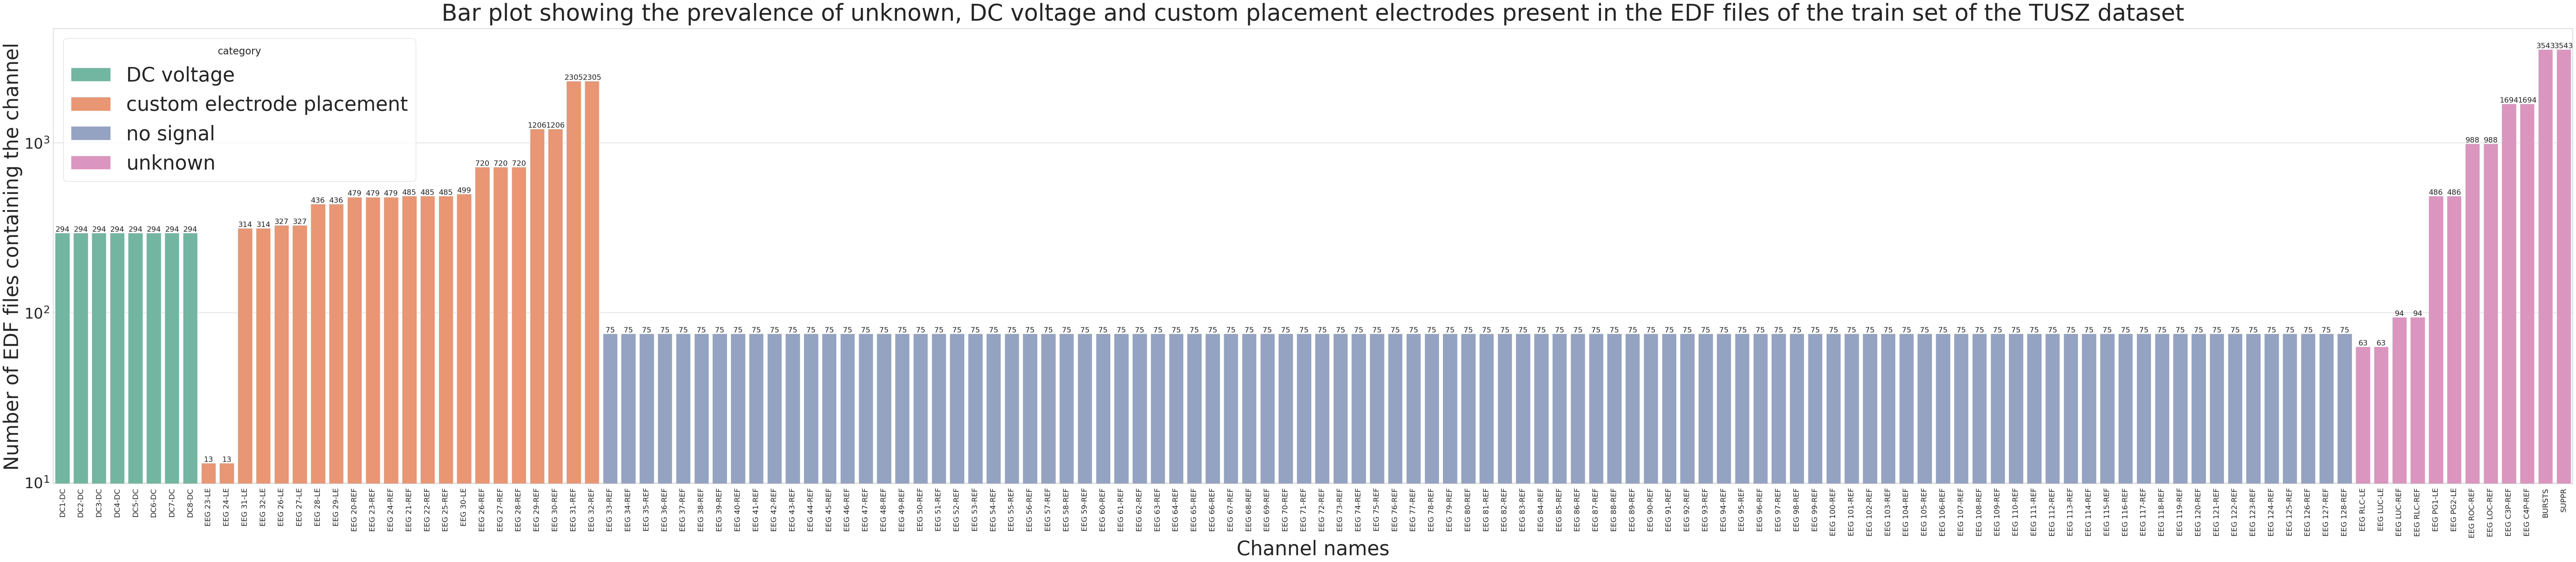

In [122]:
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

sns.set_style('whitegrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=56)     # fontsize of the axes title
plt.rc('axes', labelsize=48)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=36)    # fontsize of the tick labels
plt.rc('legend', fontsize=48)    # legend fontsize
plt.rc('font', size=18)          # controls default text sizes


plt.figure(figsize=(110,20))
colors = sns.color_palette('deep')

ax = sns.barplot(data = dev_ch_to_remove_df, x='ch_name', y='number', hue='category',width=0.8, dodge=False, palette='Set2')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1i')

for item in ax.get_xticklabels():
    item.set_rotation(90)
   
plt.yscale("log")  
plt.xlabel('Channel names')
plt.ylabel('Number of EDF files containing the channel')
plt.title('Bar plot showing the prevalence of unknown, DC voltage and custom placement electrodes present in the EDF files of the train set of the TUSZ dataset', pad=20)
plt.savefig("bad_channels_train_tusz.svg")
plt.show()

## Step 3: About sex distribution

In [123]:
sex_dict = pd.read_pickle(r'train/tuh_eeg_seizure__sex_dict.pickle')
sex_df = pd.DataFrame.from_dict(sex_dict,orient='index',columns=['number'])
sex_df = sex_df.reset_index().rename(columns={"index":"sex"})
sex_df

,sex,number
0,M,2363
1,F,2301


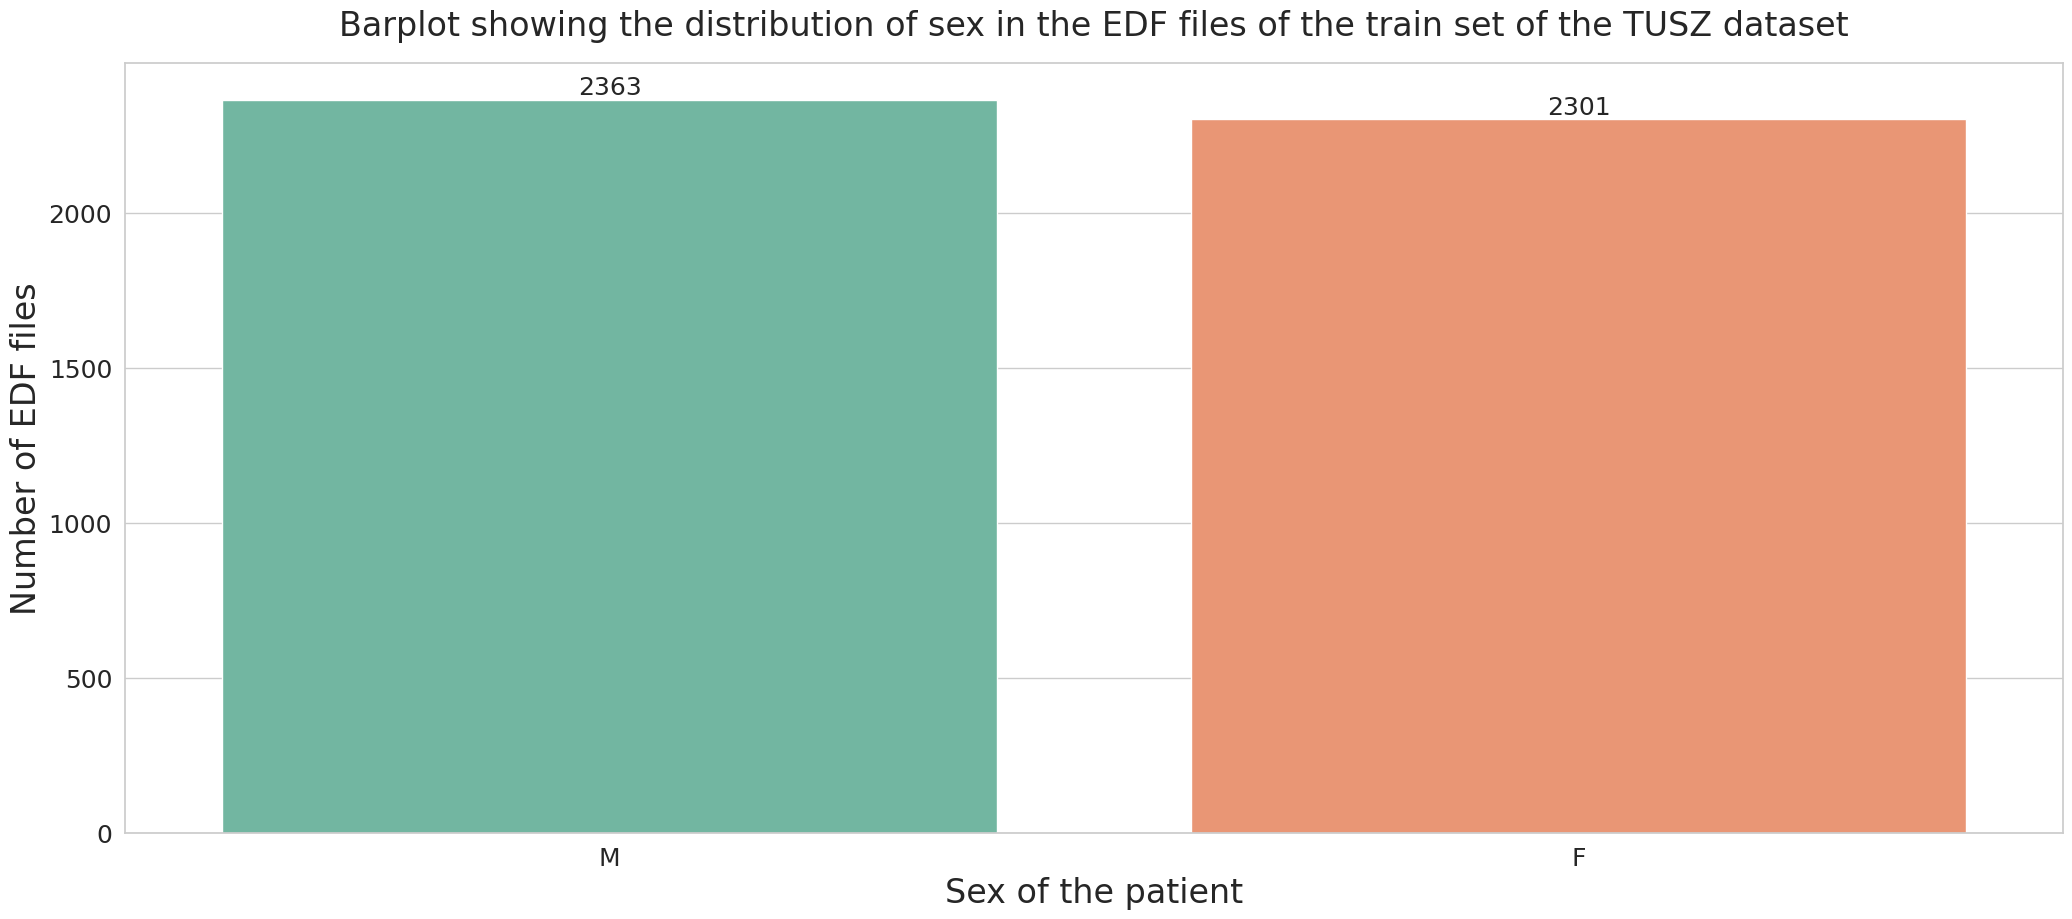

In [124]:
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

sns.set_style('whitegrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('font', size=18)          # controls default text sizes


plt.figure(figsize=(25,10))
colors = sns.color_palette('deep')

ax = sns.barplot(data = sex_df, x='sex', y='number',width=0.8, dodge=False, palette='Set2')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1i')    

plt.xlabel('Sex of the patient')
plt.ylabel('Number of EDF files')
plt.title('Barplot showing the distribution of sex in the EDF files of the train set of the TUSZ dataset', pad=20)
plt.savefig("sex_distribution_train_tusz.svg")
plt.show()

## Step 4: about the raw data - EVENTS (affects all channels)

In [125]:
import pandas as pd

raw_list = pd.read_pickle(r'train/tuh_eeg_seizure__raw_list.pickle')
raw_list[0].info['subject_info']

{'his_id': 'aaaaanjw',
 'sex': 1,
 'last_name': 'aaaaanjw',
 'age': 19,
 'path': '/rds/general/user/nm2318/home/projects/scott_data_tuh/live/tuh_eeg_seizure/v2.0.0/edf/train/aaaaanjw/s001_2012_09_07/01_tcp_ar/aaaaanjw_s001_t000.edf'}

In [126]:
len(raw_list[0].annotations)

4

In [127]:
raw_list[0].annotations[1]['description'] 

'seiz,1.0,TERM'

In [128]:
events = {}
for index in range(len(raw_list)):
    for annotations in range(len(raw_list[index].annotations)):
        if 'EVENT' in raw_list[index].annotations[annotations]['description'] :
            if raw_list[index].annotations[annotations]['description'].split(',', 1)[0] in events.keys():
                events[raw_list[index].annotations[annotations]['description'].split(',', 1)[0]] += 1
            else: 
                events[raw_list[index].annotations[annotations]['description'].split(',', 1)[0]] = 1

In [129]:
events = pd.DataFrame.from_dict(events, orient='index', columns=['number'])
events = events.reset_index().rename(columns={"index":"type"})
events

,type,number
0,bckg,13066
1,tnsz,123
2,fnsz,3502
3,gnsz,1310
4,cpsz,1258
5,spsz,57
6,absz,54
7,tcsz,150
8,mysz,3


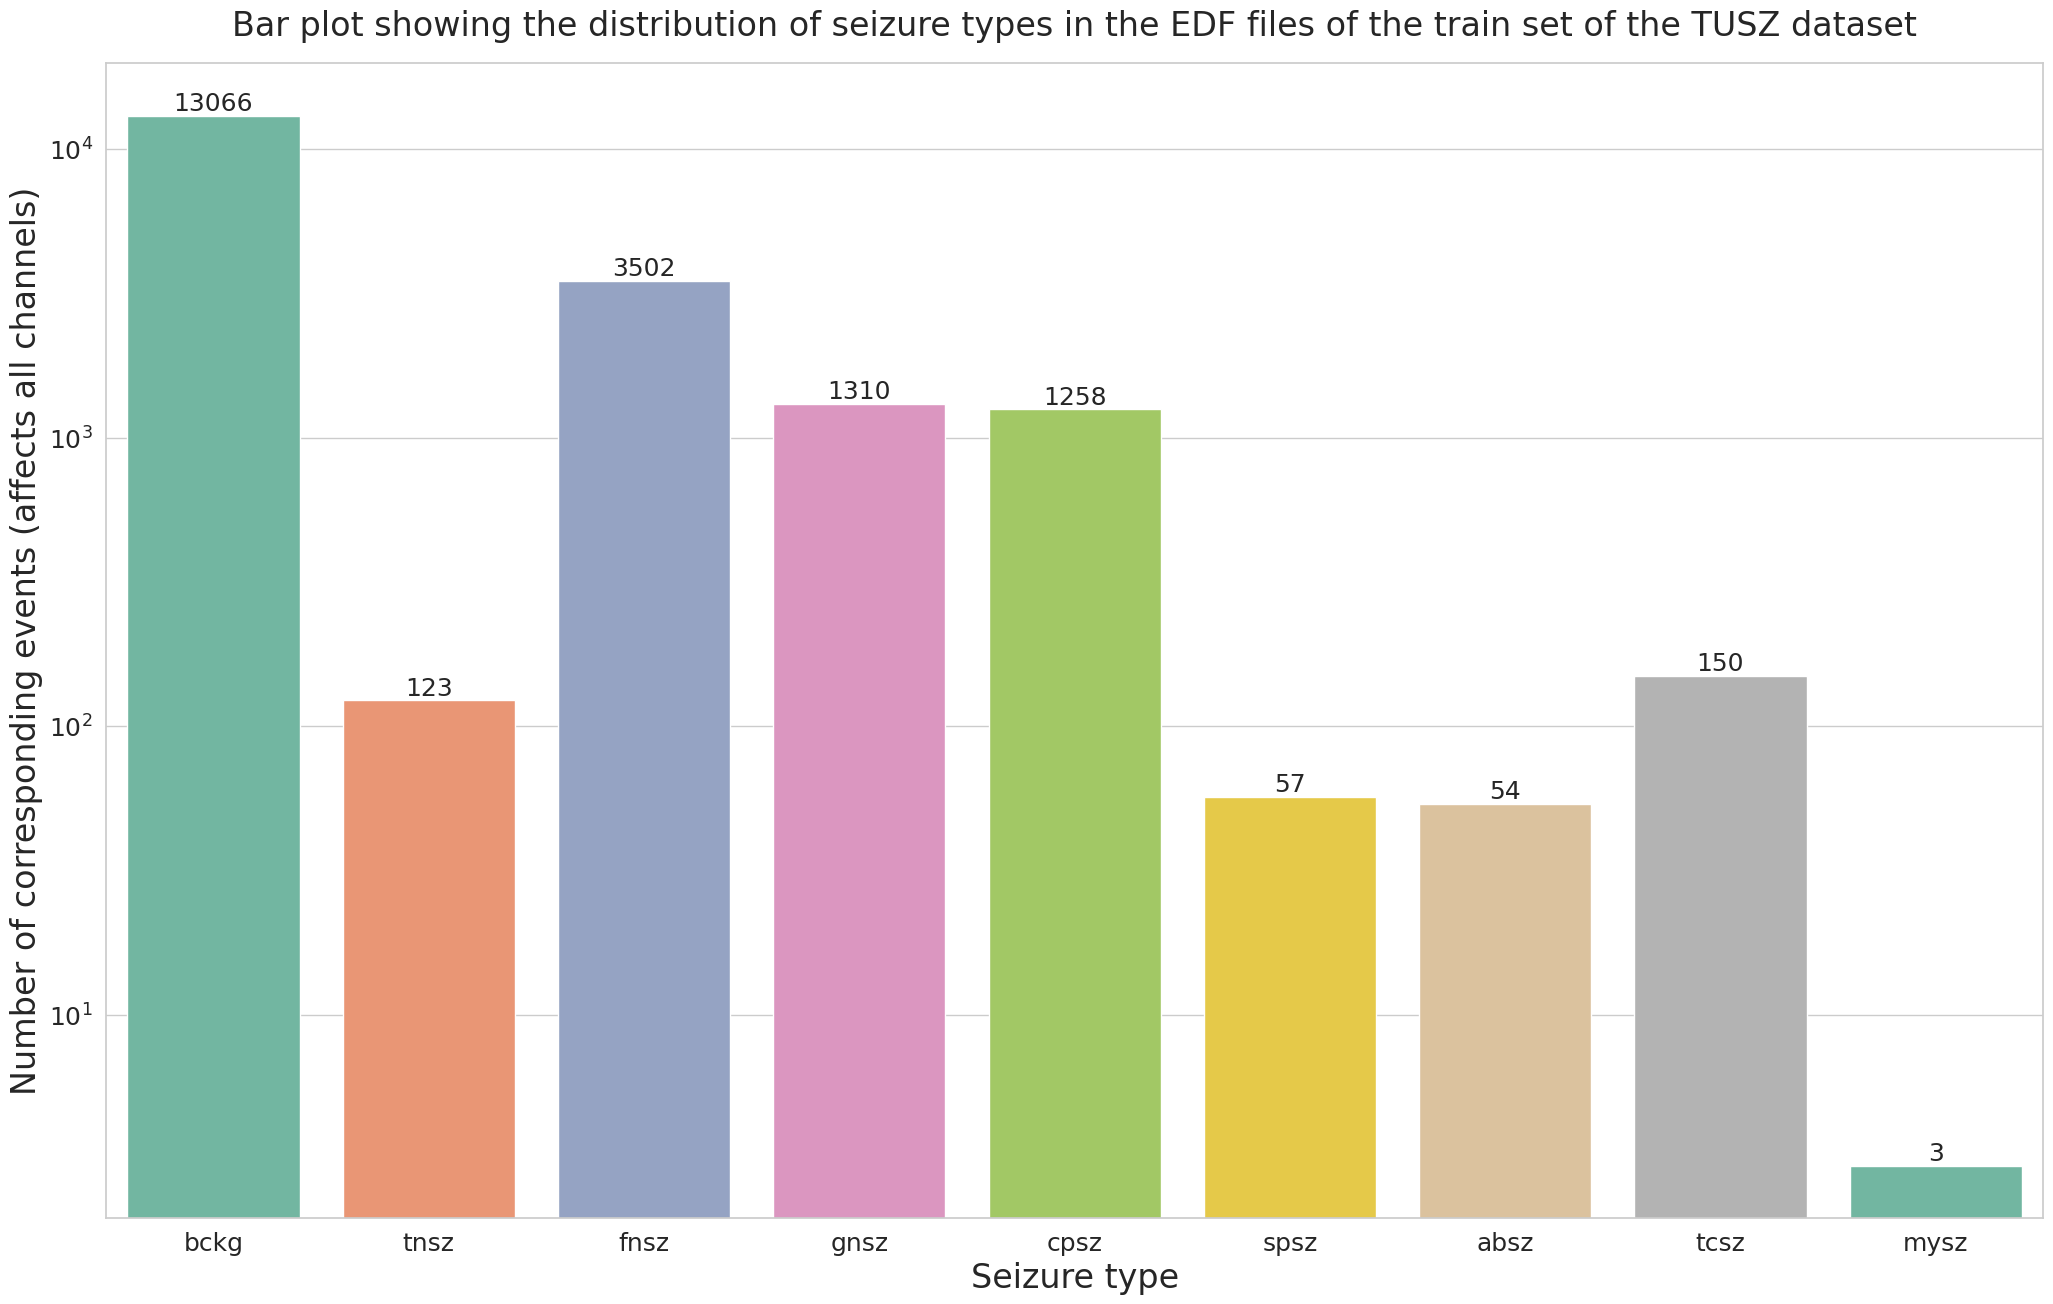

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

sns.set_style('whitegrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('font', size=18)          # controls default text sizes

    
plt.figure(figsize=(25,15))
colors = sns.color_palette('deep')

ax = sns.barplot(data = events, x='type', y='number',width=0.8, dodge=False, palette='Set2')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1i')  
    
plt.yscale("log")  
plt.xlabel('Seizure type')
plt.ylabel('Number of corresponding events (affects all channels)')
plt.title('Bar plot showing the distribution of seizure types in the EDF files of the train set of the TUSZ dataset', pad=20)
plt.savefig("bad_channels_train_tusz.svg")

plt.show()

## Step 5: length of seizure - EVENTS (affects all channels)

In [136]:
event_duration = {}
for index in range(len(raw_list)):
    for annotations in range(len(raw_list[index].annotations)):
        if 'EVENT' in raw_list[index].annotations[annotations]['description'] and (raw_list[index].annotations[annotations]['description'].split(',', 1)[0] != 'bckg'):
            #event_duration.append(raw_list[index].annotations[annotations]['duration'])
            event_duration[raw_list[index].annotations[annotations]['duration']] = raw_list[index].annotations[annotations]['description'].split(',', 1)[0]

In [137]:
event_duration_df = pd.DataFrame.from_dict(event_duration, orient='index', columns=['type'])
event_duration_df = event_duration_df.reset_index().rename(columns={"index":"duration"})
event_duration_df = event_duration_df.sort_values(['type','duration'],ascending=[True, True])
#event_duration_df['number'] = 1
event_duration_df

,duration,type
5700,2.3640,absz
2135,3.1000,absz
5701,3.3800,absz
5699,3.6840,absz
2133,4.6680,absz
...,...,...
437,31.6016,tnsz
0,40.6216,tnsz
436,51.3984,tnsz
435,58.3466,tnsz


/var/tmp/pbs.8523951.pbs/ipykernel_3826900/3226100382.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(data=event_duration_df, x ='type', y='duration', palette="husl",  alpha=0.7)


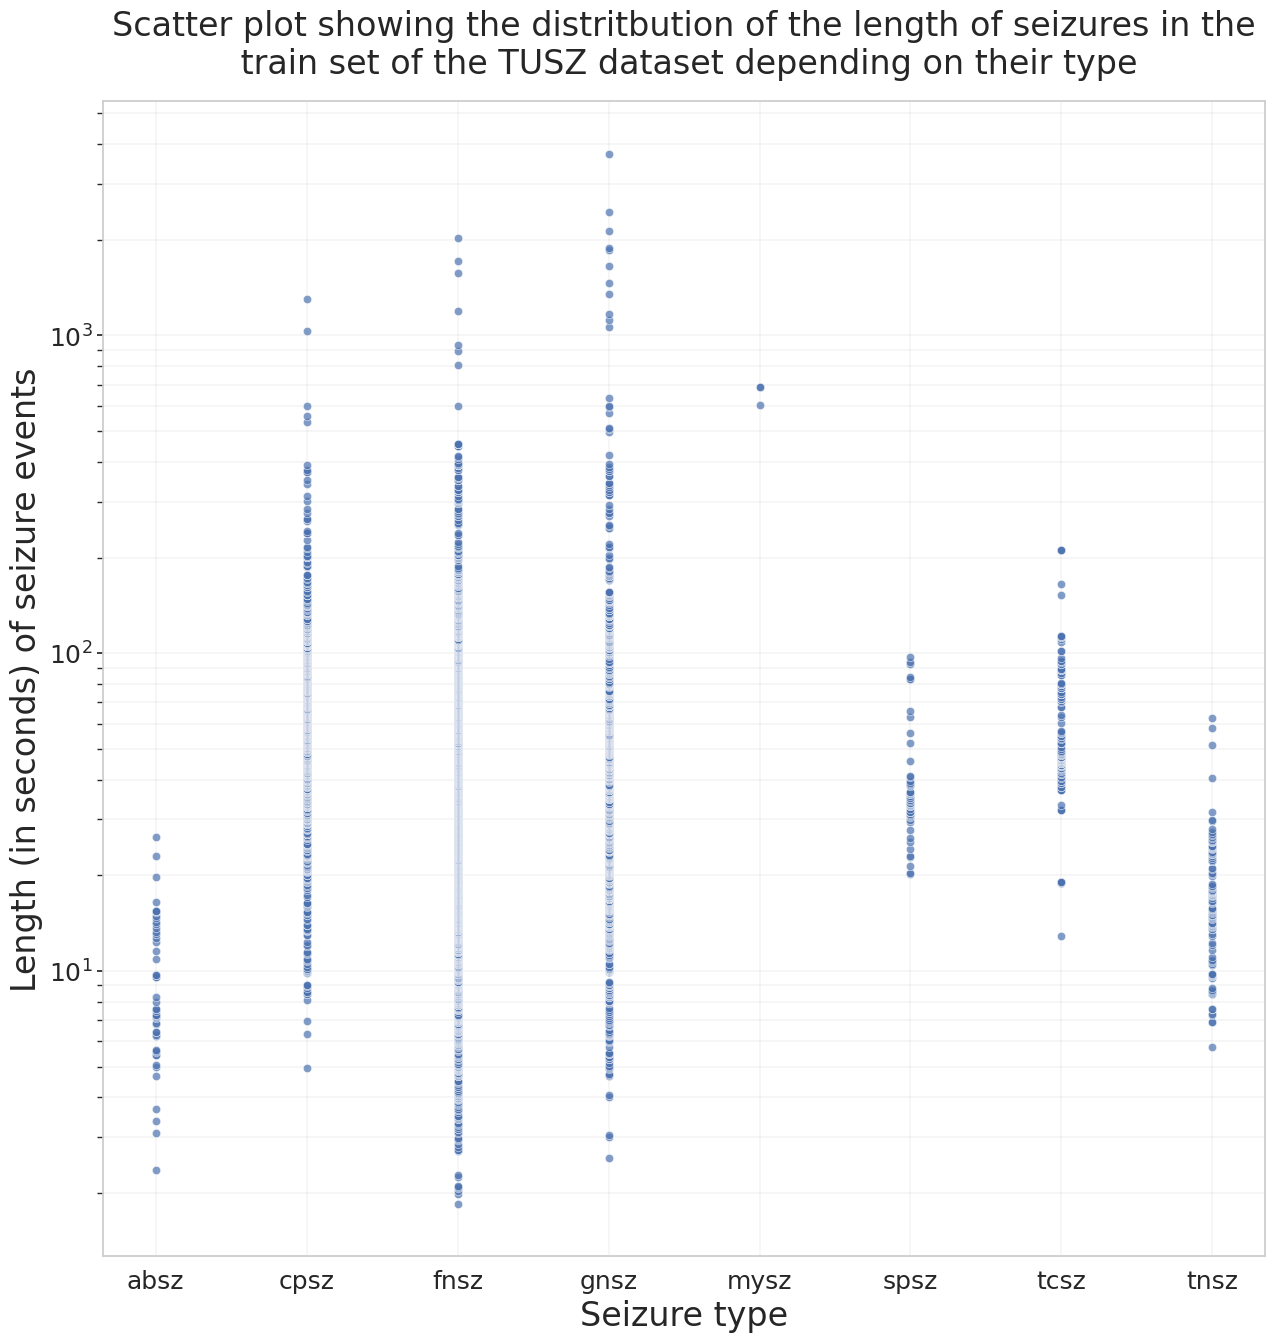

In [133]:
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

sns.set_style('whitegrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('font', size=18)  

plt.figure(figsize=(15,15))

#ax = sns.catplot(data=event_duration_df, x ='type', y='duration', palette="husl",  alpha=1, height=13, aspect=1)
ax = sns.scatterplot(data=event_duration_df, x ='type', y='duration', palette="husl",  alpha=0.7)


plt.tick_params(axis='y', which='both', direction='out', length=4, left=True)
plt.grid(which='both', color='gray', linewidth=0.1)

plt.yscale("log")  
plt.xlabel('Seizure type')
plt.ylabel('Length (in seconds) of seizure events')
plt.title('Scatter plot showing the distritbution of the length of seizures in the\n train set of the TUSZ dataset depending on their type', pad=20)
plt.savefig("length_seizure_train_tusz.svg")

plt.show()

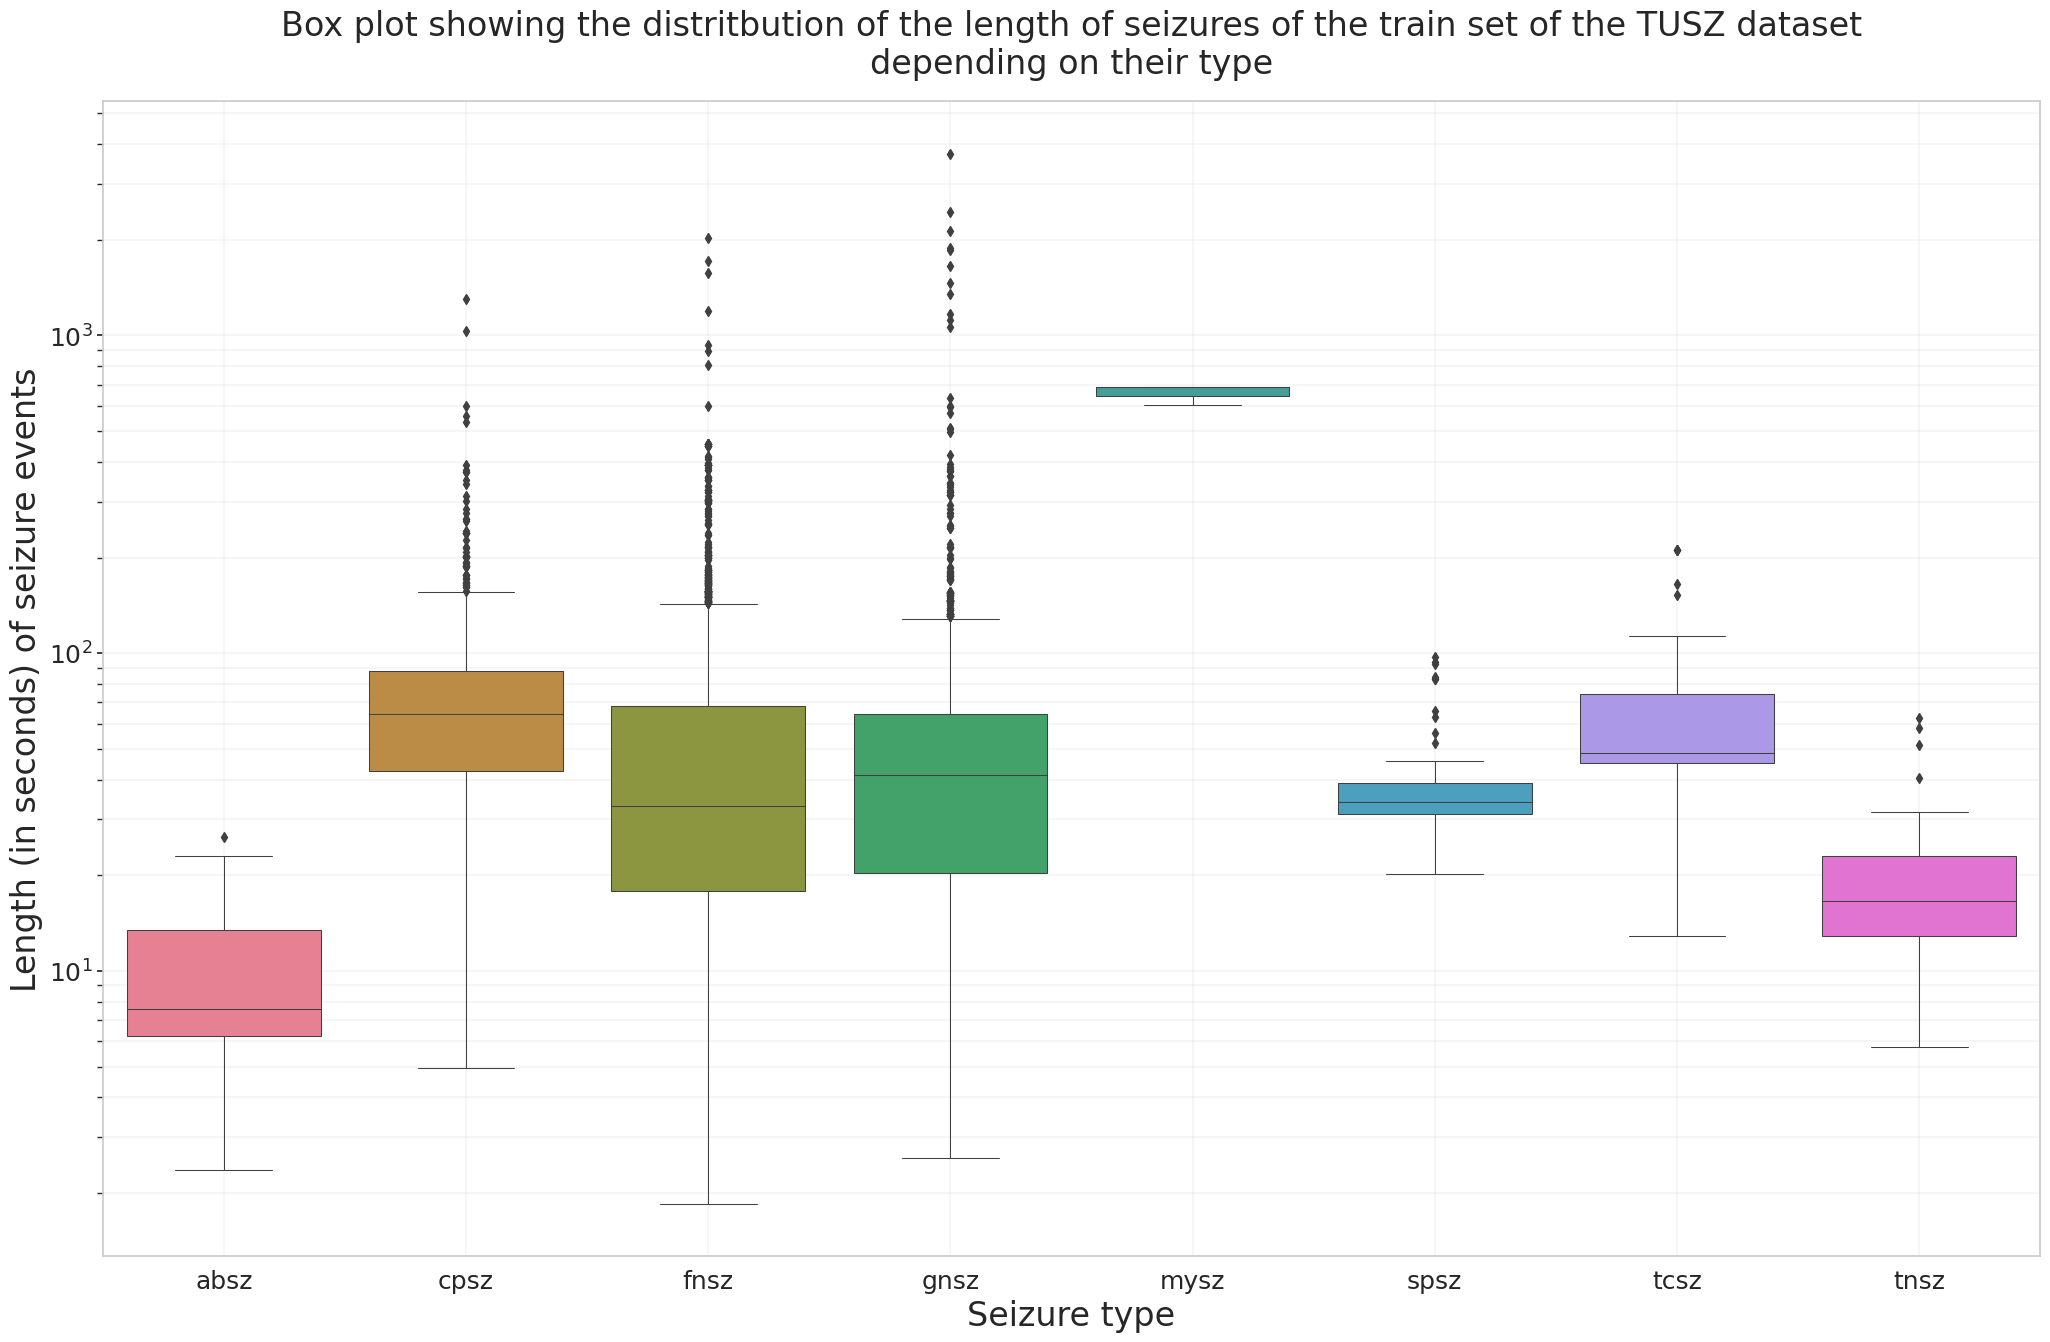

In [134]:
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter


sns.set_style('whitegrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('font', size=18)          # controls default text sizes



plt.figure(figsize=(25,15))
ax = sns.boxplot(data=event_duration_df, x ='type', y='duration', palette="husl", linewidth=0.75)
#ax=sns.boxplot(data=df ,palette="husl", linewidth=0.75)

#ax.set(xscale='linear', yscale='log')

ax.tick_params(axis='y', which='both', direction='out', length=4, left=True)
ax.grid(which='both', color='gray', linewidth=0.1)


plt.yscale("log")  
plt.xlabel('Seizure type')
plt.ylabel('Length (in seconds) of seizure events')
plt.title('Box plot showing the distritbution of the length of seizures of the train set of the TUSZ dataset\ndepending on their type', pad=20)
plt.savefig("length_seizure_boxplot_train_tusz.svg")

plt.show()